<a href="https://colab.research.google.com/github/AndrewPiasecki/PythonCourse/blob/main/Andrew_Piasecki_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 1: Income Statements

A company has two divisions that have provided historical and project income statements. The data can be found in diva-incstmt.csv and divb-incstmt.csv. Create the following charts to visualize the data:



In [37]:
import pandas as pd
import matplotlib.pyplot as plt
# read data for division A
dfdiva = pd.read_csv('/content/sample_data/diva-incstmt.csv', skiprows=5, usecols=[0,1,2,3,5])
dfdiva

,CODE,Description,Act2019,Act2020,Proj2021
0,NaN,NaN,NaN,NaN,NaN
1,SALE,Sales Revenue,43.9,40.3,50.2
2,CGS,Cost of Goods Sold,17.5,18.0,22.6
3,PROF,GROSS PROFIT,26.4,22.3,27.6
4,NaN,NaN,NaN,NaN,NaN
5,SGA,"Selling, General, and Admin",2.1,1.8,2.1
6,ADV,Advertising,1.3,1.2,1.5
7,DEP,Depreciation,2.6,2.5,3.2
8,RENT,Rental Expense,2.2,2.2,2.2
9,OTHX,Other Expense,3.1,3.2,3.4


In [38]:
# filter out empty rows
dfdiva = dfdiva[dfdiva.CODE.notna()]
dfdiva

,CODE,Description,Act2019,Act2020,Proj2021
1,SALE,Sales Revenue,43.9,40.3,50.2
2,CGS,Cost of Goods Sold,17.5,18.0,22.6
3,PROF,GROSS PROFIT,26.4,22.3,27.6
5,SGA,"Selling, General, and Admin",2.1,1.8,2.1
6,ADV,Advertising,1.3,1.2,1.5
7,DEP,Depreciation,2.6,2.5,3.2
8,RENT,Rental Expense,2.2,2.2,2.2
9,OTHX,Other Expense,3.1,3.2,3.4
10,EXP,TOTAL EXPENSES,11.3,10.9,12.4
12,EBT,EARNINGS BEFORE TAXES,15.1,11.4,15.2


In [39]:
# read data for division B
dfdivb = pd.read_csv('/content/sample_data/divb-incstmt.csv', skiprows=5, usecols=[0,1,2,3,5])
dfdivb = dfdivb[dfdivb.CODE.notna()]
dfdivb

,CODE,Description,Act2019,Act2020,Proj2021
1,SALE,Sales Revenue,33.9,30.3,33.9
2,CGS,Cost of Goods Sold,17.5,18.0,14.3
3,PROF,GROSS PROFIT,16.4,12.3,19.7
5,SGA,"Selling, General, and Admin",2.1,1.8,2.1
6,ADV,Advertising,1.3,1.2,4.5
7,DEP,Depreciation,2.1,2.0,3.2
8,RENT,Rental Expense,1.5,1.5,2.2
9,OTHX,Other Expense,3.0,3.0,2.0
10,EXP,TOTAL EXPENSES,10.0,9.5,14.0
12,EBT,EARNINGS BEFORE TAXES,6.4,2.8,5.7


a) a stacked bar chart of historical and projected sales over time that includes both divisions’ sales

In [40]:
# extract sales data for division A
dfsalesa = dfdiva.loc[dfdiva['CODE'] =='SALE' ]
dfsalesa.index = ['A']
dfsalesa

,CODE,Description,Act2019,Act2020,Proj2021
A,SALE,Sales Revenue,43.9,40.3,50.2


In [41]:
# extract sales data for division B
dfsalesb = dfdivb.loc[dfdivb['CODE'] == 'SALE']
dfsalesb.index = ['B']
dfsalesb

,CODE,Description,Act2019,Act2020,Proj2021
B,SALE,Sales Revenue,33.9,30.3,33.9


In [42]:
# consolidate sales data for both divisions
dfsales = pd.concat([dfsalesa, dfsalesb])
dfsales

,CODE,Description,Act2019,Act2020,Proj2021
A,SALE,Sales Revenue,43.9,40.3,50.2
B,SALE,Sales Revenue,33.9,30.3,33.9


In [43]:
# transpose sales data so time dimension is index
df_transposed = dfsales.T
df_transposed

,A,B
CODE,SALE,SALE
Description,Sales Revenue,Sales Revenue
Act2019,43.9,33.9
Act2020,40.3,30.3
Proj2021,50.2,33.9


In [44]:
# Reset the index
dft = df_transposed.drop(['CODE', 'Description'])

b) a clustered bar chart of sales over time that includes both divisions’ sales

In [45]:
dft['A'] = dft['A'].astype(float)
dft['B'] = dft['B'].astype(float)


<Axes: >

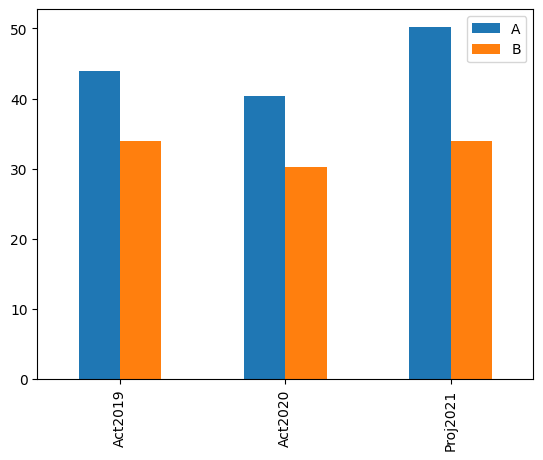

In [46]:
dft.plot(kind = 'bar')

c) two separate pie charts, one for each division, showing the different kinds of expenses forecasted for 2021

In [47]:
# reload data for division A
dfdivaproj = pd.read_csv('/content/sample_data/diva-incstmt.csv', skiprows=5, usecols=[0, 5])
dfdivaproj = dfdivaproj[dfdivaproj.CODE.notna()]
dfdivaproj

,CODE,Proj2021
1,SALE,50.2
2,CGS,22.6
3,PROF,27.6
5,SGA,2.1
6,ADV,1.5
7,DEP,3.2
8,RENT,2.2
9,OTHX,3.4
10,EXP,12.4
12,EBT,15.2


In [48]:
# filter in expense related items

dfdivaproj = dfdivaproj[dfdivaproj['CODE'].isin(['SGA', 'ADV', 'DEP', 'RENT', 'OTHX'])]
dfdivaproj

,CODE,Proj2021
5,SGA,2.1
6,ADV,1.5
7,DEP,3.2
8,RENT,2.2
9,OTHX,3.4


In [49]:
# set CODE as index
dfdivaproj = dfdivaproj.set_index(['CODE'])
dfdivaproj

,Proj2021
CODE,
SGA,2.1
ADV,1.5
DEP,3.2
RENT,2.2
OTHX,3.4


array([<Axes: ylabel='Proj2021'>], dtype=object)

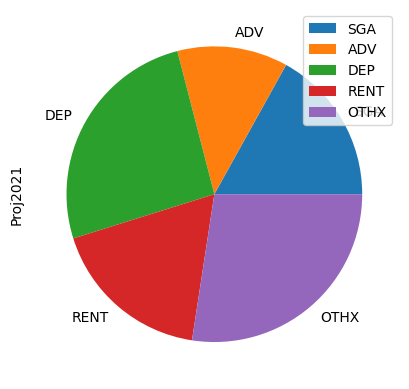

In [51]:
dfdivaproj.plot(kind = 'pie', subplots = True)

In [52]:
# create sales DataFrame for division B
dfdivbproj = pd.read_csv('/content/sample_data/divb-incstmt.csv', skiprows=5, usecols=[0, 5])
dfdivbproj

,CODE,Proj2021
0,NaN,NaN
1,SALE,33.9
2,CGS,14.3
3,PROF,19.7
4,NaN,NaN
5,SGA,2.1
6,ADV,4.5
7,DEP,3.2
8,RENT,2.2
9,OTHX,2.0


In [53]:
dfdivbproj = dfdivbproj[dfdivbproj['CODE'].isin(['SGA', 'ADV', 'DEP', 'RENT', 'OTHX'])]
dfdivbproj

,CODE,Proj2021
5,SGA,2.1
6,ADV,4.5
7,DEP,3.2
8,RENT,2.2
9,OTHX,2.0


In [56]:
dfdivbproj = dfdivbproj.set_index(['CODE'])
dfdivbproj

,Proj2021
CODE,
SGA,2.1
ADV,4.5
DEP,3.2
RENT,2.2
OTHX,2.0


array([<Axes: ylabel='Proj2021'>], dtype=object)

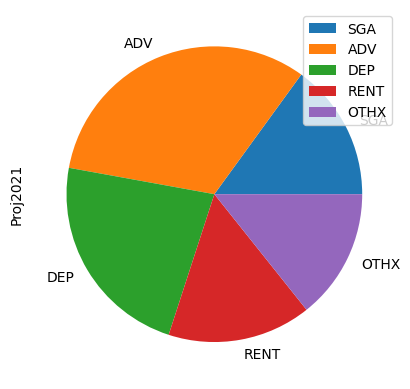

In [57]:
dfdivbproj.plot(kind = 'pie', subplots = True)

## Problem 2: Tracking Infections

A county is tracking infections over time in order to watch for potential outbreaks. The data are included in countyhealth.csv and countypop.csv. For these data:



In [ ]:
dfcases = pd.read_csv('countyhealth.csv')
dfcases

,Date,Towncode,Cases
0,2022-01-01,EA,100
1,2022-01-08,EA,98
2,2022-01-15,EA,96
3,2022-01-22,EA,97
4,2022-01-29,EA,98
...,...,...,...
103,2022-06-04,SO,20
104,2022-06-11,SO,18
105,2022-06-18,SO,16
106,2022-06-25,SO,14


In [ ]:
dfcases2 = dfcases.pivot(index='Date', columns='Towncode', values='Cases')
dfcases2

Towncode,EA,NO,SO,WE
Date,,,,
2022-01-01,100,75,25,50
2022-01-08,98,69,26,53
2022-01-15,96,64,29,56
2022-01-22,97,62,31,59
2022-01-29,98,60,34,60
2022-02-05,96,55,36,61
2022-02-12,94,51,38,65
2022-02-19,95,47,40,66
2022-02-26,96,45,43,67


a) Create a line chart showing infections over time that includes all cities.

<Axes: xlabel='Date'>

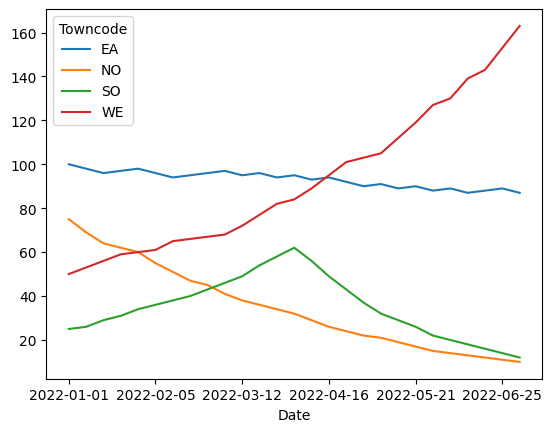

b) Create a stacked bar chart showing the total number of infections in each month.

<Axes: xlabel='Date'>

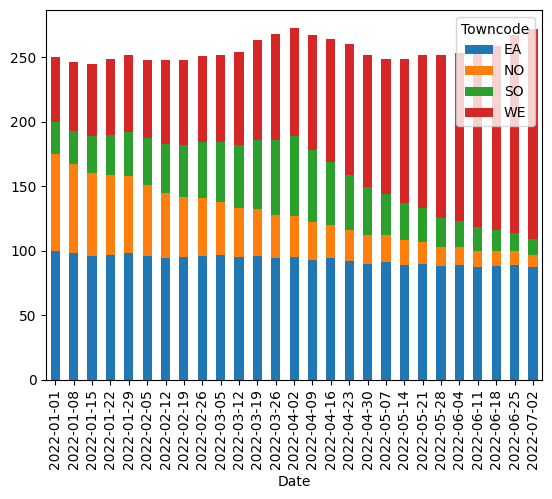

c) Create a line chart that shows each city’s infections over time as a percentage of the city’s population.

In [ ]:
dfpop = pd.read_csv('countypop.csv', index_col='Towncode')
dfpop

,Townname,Population
Towncode,,
EA,Eastville,10000
WE,Weston,5000
NO,Northdale,7500
SO,Southberg,2500


Index(['EA', 'NO', 'SO', 'WE'], dtype='object', name='Towncode')

In [ ]:
# calculate cases as a percent of population


Towncode,EA,NO,SO,WE,EApct,NOpct,SOpct,WEpct
Date,,,,,,,,
2022-01-01,100,75,25,50,0.0100,0.010000,0.0100,0.0100
2022-01-08,98,69,26,53,0.0098,0.009200,0.0104,0.0106
2022-01-15,96,64,29,56,0.0096,0.008533,0.0116,0.0112
2022-01-22,97,62,31,59,0.0097,0.008267,0.0124,0.0118
2022-01-29,98,60,34,60,0.0098,0.008000,0.0136,0.0120
2022-02-05,96,55,36,61,0.0096,0.007333,0.0144,0.0122
2022-02-12,94,51,38,65,0.0094,0.006800,0.0152,0.0130
2022-02-19,95,47,40,66,0.0095,0.006267,0.0160,0.0132
2022-02-26,96,45,43,67,0.0096,0.006000,0.0172,0.0134


In [ ]:
# get percent data in its own DataFrame
dfpct =

Towncode,EApct,WEpct,NOpct,SOpct
Date,,,,
2022-01-01,0.0100,0.0100,0.010000,0.0100
2022-01-08,0.0098,0.0106,0.009200,0.0104
2022-01-15,0.0096,0.0112,0.008533,0.0116
2022-01-22,0.0097,0.0118,0.008267,0.0124
2022-01-29,0.0098,0.0120,0.008000,0.0136
2022-02-05,0.0096,0.0122,0.007333,0.0144
2022-02-12,0.0094,0.0130,0.006800,0.0152
2022-02-19,0.0095,0.0132,0.006267,0.0160
2022-02-26,0.0096,0.0134,0.006000,0.0172


<Axes: xlabel='Date'>

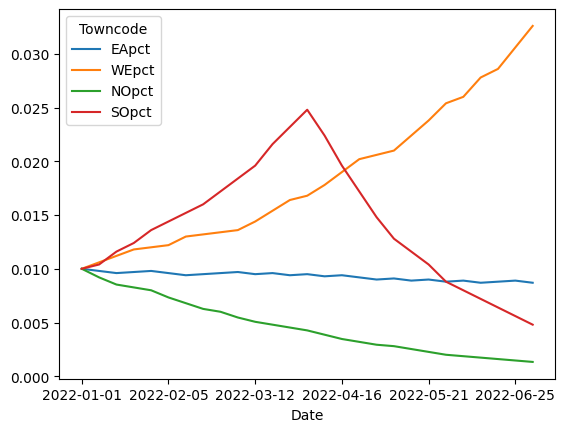